<a href="https://colab.research.google.com/github/Cromana22/Google-Colab-Examples/blob/main/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create Data and Do Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.subplots
from plotly.subplots import make_subplots
import plotly.io as pio

# Reproducibility
np.random.seed(42)

# Example DataFrame (categorical + summary)
df = pd.DataFrame({
    "Category": np.random.choice(["A", "B", "C", "D", "E"], 100),
    "Datetime": pd.date_range(start="1990-01-01", periods=100, freq="D"),
    "Value1": np.random.randint(10, 100, 100),
    "Value2": np.random.randint(10, 100, 100),
    "X": np.random.randn(100),
    "Y": np.random.randn(100) * 2 + 1,
})

Matplotlib Basic Plotting

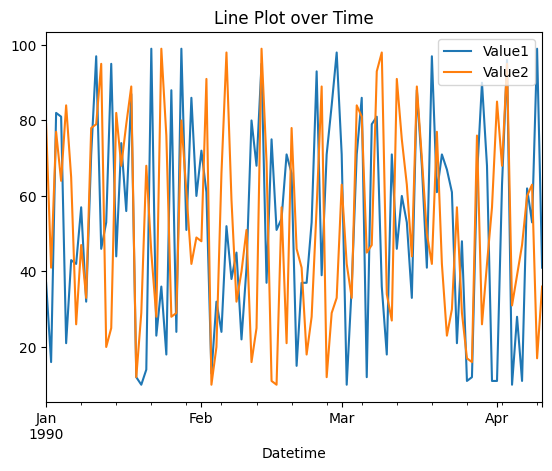

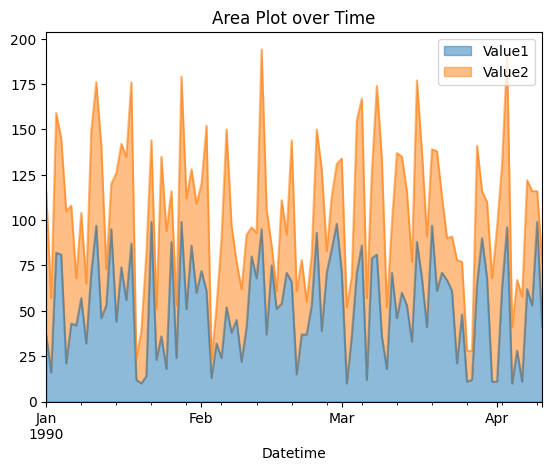

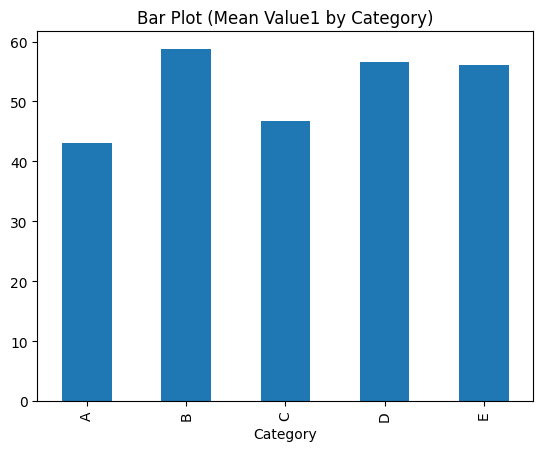

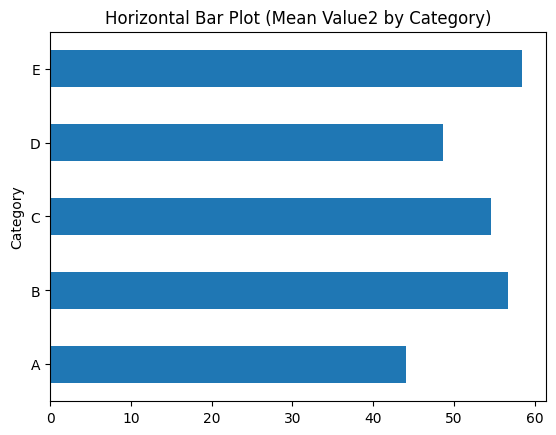

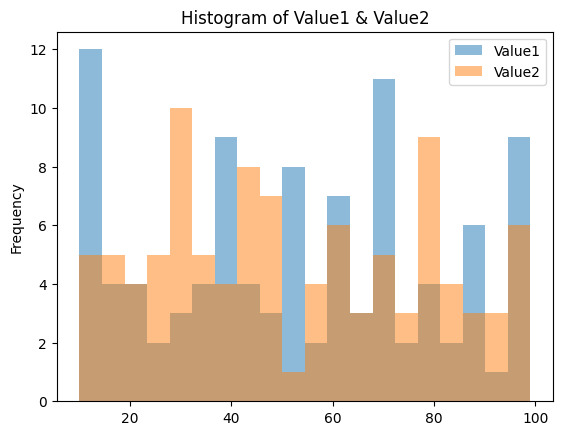

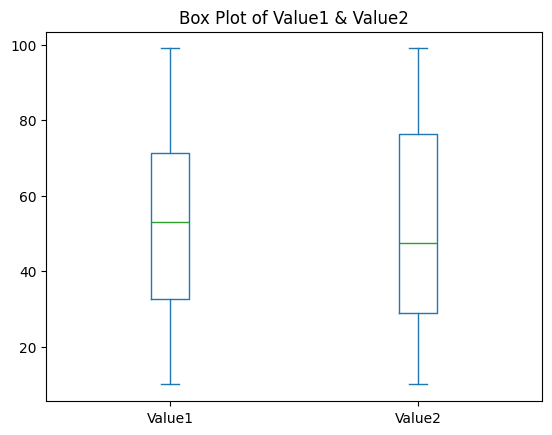

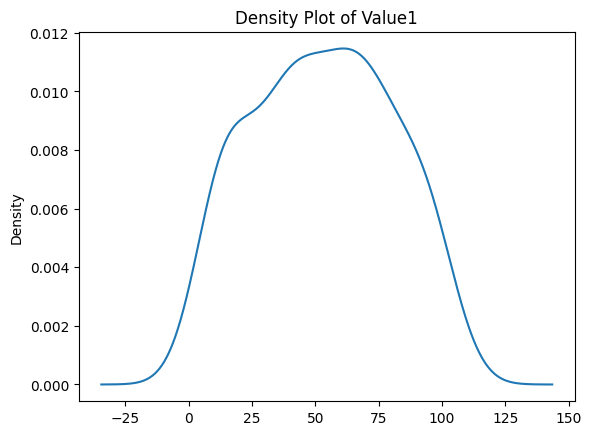

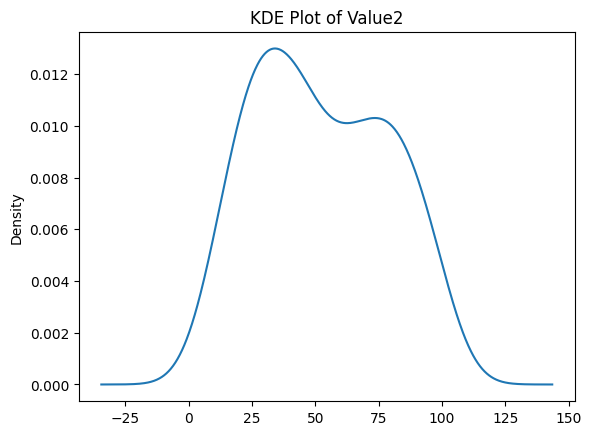

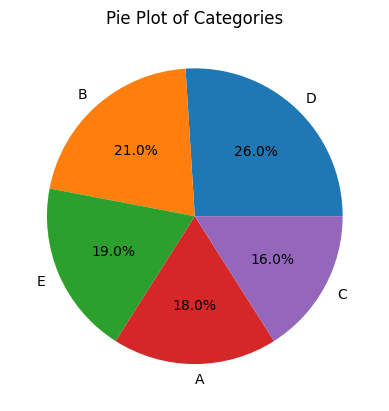

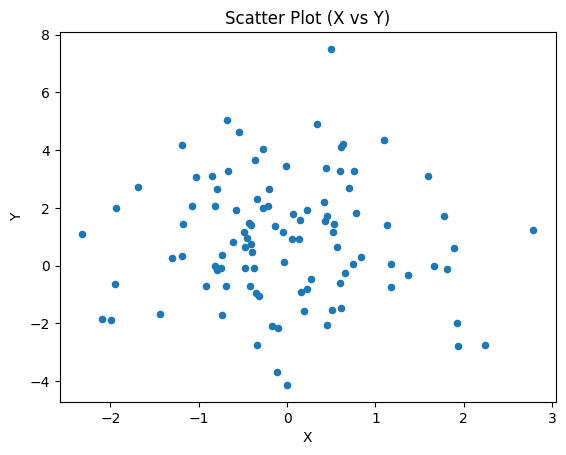

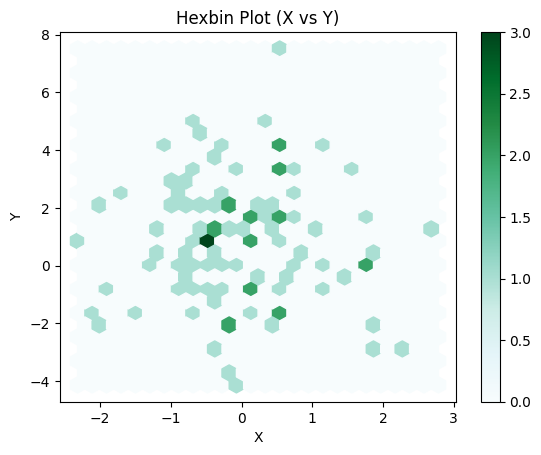

In [2]:
print()  # just for clarity

# 1. Line plot (over time)
df.set_index("Datetime")[["Value1", "Value2"]].plot.line(title="Line Plot over Time")
plt.show()  # this triggers the plot to be drawn out before it does the next. avoids it "smartly" using the same axes to draw things on.

# 2. Area plot (over time)
df.set_index("Datetime")[["Value1", "Value2"]].plot.area(title="Area Plot over Time", alpha=0.5)
plt.show()

# 3. Bar plot (mean Value1 per Category)
df.groupby("Category")["Value1"].mean().plot.bar(title="Bar Plot (Mean Value1 by Category)")
plt.show()

# 4. Horizontal bar plot (mean Value2 per Category)
df.groupby("Category")["Value2"].mean().plot.barh(title="Horizontal Bar Plot (Mean Value2 by Category)")
plt.show()

# 5. Histogram (distribution of Value1 & Value2)
df[["Value1", "Value2"]].plot.hist(alpha=0.5, bins=20, title="Histogram of Value1 & Value2")
plt.show()

# 6. Box plot (Value1 & Value2)
df[["Value1", "Value2"]].plot.box(title="Box Plot of Value1 & Value2")
plt.show()

# 7. Density plot (Value1 distribution)
df["Value1"].plot.density(title="Density Plot of Value1")
plt.show()

# 8. KDE plot (Value2 distribution)
df["Value2"].plot.kde(title="KDE Plot of Value2")
plt.show()

# 9. Pie plot (proportion of categories)
df["Category"].value_counts().plot.pie(title="Pie Plot of Categories", autopct="%1.1f%%", ylabel="")  # clean up y-label for better reading
plt.show()

# 10. Scatter plot (X vs Y)
df.plot.scatter(x="X", y="Y", title="Scatter Plot (X vs Y)")
plt.show()

# 11. Hexbin plot (X vs Y)
df.plot.hexbin(x="X", y="Y", gridsize=25, title="Hexbin Plot (X vs Y)")
plt.show()


Matplotlib Subplot and Style

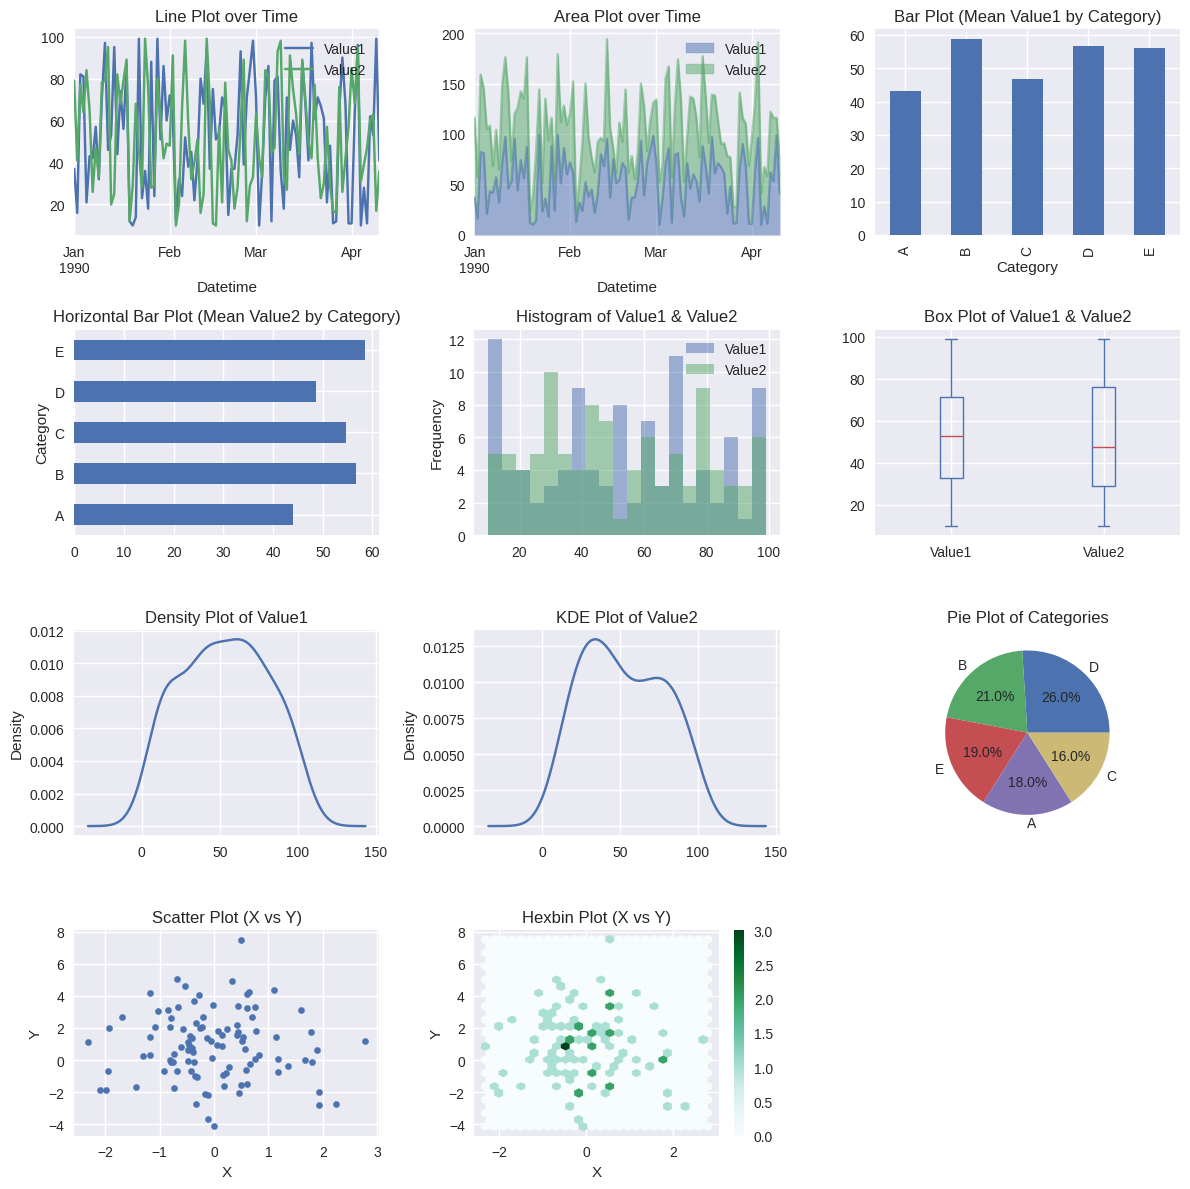

In [3]:
print()  # blank line for layout

plt.style.use('seaborn-v0_8')

# Create 4x3 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(12, 12))  # figsize sets the size of the charts/graphs
axes = axes.flatten()  # make 1D for easy indexing


df.set_index("Datetime")[["Value1", "Value2"]].plot.line(title="Line Plot over Time", ax=axes[0])  # ax says which plot it is sequentially starting from 0
df.set_index("Datetime")[["Value1", "Value2"]].plot.area(title="Area Plot over Time", alpha=0.5, ax=axes[1])
df.groupby("Category")["Value1"].mean().plot.bar(title="Bar Plot (Mean Value1 by Category)", ax=axes[2])
df.groupby("Category")["Value2"].mean().plot.barh(title="Horizontal Bar Plot (Mean Value2 by Category)", ax=axes[3])
df[["Value1", "Value2"]].plot.hist(alpha=0.5, bins=20, title="Histogram of Value1 & Value2", ax=axes[4])
df[["Value1", "Value2"]].plot.box(title="Box Plot of Value1 & Value2", ax=axes[5])
df["Value1"].plot.density(title="Density Plot of Value1", ax=axes[6])
df["Value2"].plot.kde(title="KDE Plot of Value2", ax=axes[7])
df["Category"].value_counts().plot.pie(title="Pie Plot of Categories", autopct="%1.1f%%", ylabel="", ax=axes[8])
df.plot.scatter(x="X", y="Y", title="Scatter Plot (X vs Y)", ax=axes[9])
df.plot.hexbin(x="X", y="Y", gridsize=25, title="Hexbin Plot (X vs Y)", ax=axes[10])

# Remove the empty last subplot (12th slot)
fig.delaxes(axes[11])

# Adjust layout
plt.tight_layout()  # tells it to work out night padding between grids
plt.show()

print()  # blank line for layout

Plotly Plotting

In [4]:
print()  # just for clarity

# 1. Line plot (over time)
# Plotly Express
fig = px.line(df, x="Datetime", y=["Value1", "Value2"], title="Line Plot over Time")
fig.show()

# 2. Area plot (over time)
# Plotly Express
fig = px.area(df.melt(id_vars=['Datetime'], value_vars=['Value1', 'Value2']), x="Datetime", y="value", color="variable", title="Area Plot over Time")
fig.show()

# 3. Bar plot (mean Value1 per Category)
# Plotly Express
mean_value1 = df.groupby("Category")["Value1"].mean().reset_index()
fig = px.bar(mean_value1, x="Category", y="Value1", title="Bar Plot (Mean Value1 by Category)")
fig.show()

# 4. Horizontal bar plot (mean Value2 per Category)
# Plotly Express
mean_value2 = df.groupby("Category")["Value2"].mean().reset_index()
fig = px.bar(mean_value2, x="Value2", y="Category", orientation='h', title="Horizontal Bar Plot (Mean Value2 by Category)")
fig.show()

# 5. Histogram (distribution of Value1 & Value2)
# Plotly Graph Objects
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["Value1"], name="Value1", opacity=0.5, nbinsx=20)) # nbinsx is number of histrogram 'groups' to create.
fig.add_trace(go.Histogram(x=df["Value2"], name="Value2", opacity=0.5, nbinsx=20))
fig.update_layout(title="Histogram of Value1 & Value2", barmode='overlay')
fig.show()

# 6. Box plot (Value1 & Value2)
# Plotly Graph Objects
fig = go.Figure()
fig.add_trace(go.Box(y=df["Value1"], name="Value1"))
fig.add_trace(go.Box(y=df["Value2"], name="Value2"))
fig.update_layout(title="Box Plot of Value1 & Value2")
fig.show()

# 7. Density plot (Value1 distribution)
# Plotly Figure Factory
fig = ff.create_distplot([df["Value1"]], ["Value1"], show_hist=False, show_rug=False)
fig.update_layout(title="Density Plot of Value1")
fig.show()

# 8. Does not have KDE plots.

# 9. Pie plot (proportion of categories)
# Plotly Express
category_counts = df["Category"].value_counts()
fig = px.pie(values=category_counts.values, names=category_counts.index, title="Pie Plot of Categories")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# 10. Scatter plot (X vs Y)
# Plotly Express
fig = px.scatter(df, x="X", y="Y", title="Scatter Plot (X vs Y)")
fig.show()

# Does not have hexbin plots.

Plotly Subplot and Style

In [5]:
print()  # blank line for layout
pio.templates.default = "plotly_dark"

# Create 4x3 subplot grid
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=[
        "Line Plot over Time", "Area Plot over Time", "Bar Plot (Mean Value1 by Category)", "Horizontal Bar Plot (Mean Value2 by Category)", "Histogram of Value1 & Value2",
        "Box Plot of Value1 & Value2", "Density Plot of Value1", "Pie Plot of Categories", "Scatter Plot (X vs Y)"
    ],
    specs=[[{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"type": "pie"}, {"secondary_y": False}]],  # If you had blanks include None instead of {}
    vertical_spacing=0.08,
    horizontal_spacing=0.08
)

# 1. Line plot (row=1, col=1)
fig.add_trace(go.Scatter(x=df["Datetime"], y=df["Value1"], name="Value1", mode='lines'), row=1, col=1)
fig.add_trace(go.Scatter(x=df["Datetime"], y=df["Value2"], name="Value2", mode='lines'), row=1, col=1)

# 2. Area plot (row=1, col=2)
fig.add_trace(go.Scatter(x=df["Datetime"], y=df["Value1"], name="Value1", fill='tonexty', opacity=0.5), row=1, col=2)
fig.add_trace(go.Scatter(x=df["Datetime"], y=df["Value2"], name="Value2", fill='tonexty', opacity=0.5), row=1, col=2)

# 3. Bar plot (row=1, col=3)
mean_value1 = df.groupby("Category")["Value1"].mean()
fig.add_trace(go.Bar(x=mean_value1.index, y=mean_value1.values, name="Mean Value1"), row=1, col=3)

# 4. Horizontal bar plot (row=2, col=1)
mean_value2 = df.groupby("Category")["Value2"].mean()
fig.add_trace(go.Bar(x=mean_value2.values, y=mean_value2.index, name="Mean Value2", orientation='h'), row=2, col=1)

# 5. Histogram (row=2, col=2)
fig.add_trace(go.Histogram(x=df["Value1"], name="Value1", opacity=0.5, nbinsx=20), row=2, col=2)
fig.add_trace(go.Histogram(x=df["Value2"], name="Value2", opacity=0.5, nbinsx=20), row=2, col=2)

# 6. Box plot (row=2, col=3)
fig.add_trace(go.Box(y=df["Value1"], name="Value1"), row=2, col=3)
fig.add_trace(go.Box(y=df["Value2"], name="Value2"), row=2, col=3)

# 7. Density plot (row=3, col=1) - using histogram with density normalization
density_fig = ff.create_distplot([df["Value1"].dropna()], ["Value1"], show_hist=False, show_rug=False)
fig.add_trace(density_fig.data[0], row=3, col=1)

# 9. Pie plot (row=3, col=3)
category_counts = df["Category"].value_counts()
fig.add_trace(go.Pie(labels=category_counts.index, values=category_counts.values,
                    name="Categories", textinfo='label+percent'), row=3, col=2)

# 10. Scatter plot (row=4, col=1)
fig.add_trace(go.Scatter(x=df["X"], y=df["Y"], mode='markers', name="X vs Y"), row=3, col=3)

# Update layout for better appearance
fig.update_layout(
    height=1200,  # equivalent to figsize height
    width=1200,   # equivalent to figsize width
    showlegend=False,  # turn off legend to reduce clutter in subplots
    title_text="Multiple Plot Dashboard",
    title_x=0.5,
    barmode='overlay'  # Update histogram overlay mode
)

fig.show()

print()  # blank line for layout

Experiments

In [17]:
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.express as px

# --------------------------
# 1️⃣ Load the shapefile
# --------------------------
# Replace this path with where your .shp file is saved
shp_path = "Ward_Boundaries.shp"

wards = gpd.read_file(shp_path)

# --------------------------
# 2️⃣ Filter to Peterborough only (if needed)
# --------------------------
# Try to detect which column contains the local authority name
for col in wards.columns:
    if wards[col].dtype == object:
        if wards[col].str.contains("Peterborough", case=False, na=False).any():
            wards = wards[wards[col].str.contains("Peterborough", case=False, na=False)]
            break

wards = wards.to_crs(epsg=4326)  # convert to WGS84 lat/lon

# --------------------------
# 3️⃣ Compute area and simulated population density
# --------------------------
# Reproject to British National Grid (EPSG:27700) to get accurate areas
wards_bng = wards.to_crs(epsg=27700)
wards["area_m2"] = wards_bng.geometry.area
wards["area_km2"] = wards["area_m2"] / 1e6

# Simulate population per ward (replace later with ONS or Census data if desired)
np.random.seed(42)
wards["population"] = (
    np.random.uniform(2000, 20000, size=len(wards)) *
    (wards["area_km2"] / wards["area_km2"].mean())
).round().astype(int)

wards["pop_density"] = wards["population"] / wards["area_km2"]

# --------------------------
# 4️⃣ Pick a ward name column for hover labels
# --------------------------
name_col = None
for col in ["WD21NM", "WARD_NAME", "Name", "WARD", "Ward", "name", "wd15nm"]:
    if col in wards.columns:
        name_col = col
        break
if name_col is None:
    wards["ward_name"] = wards.index.astype(str)
    name_col = "ward_name"

# --------------------------
# 5️⃣ Plot choropleth map
# --------------------------
fig = px.choropleth_mapbox(
    wards,
    geojson=wards.geometry.__geo_interface__,
    locations=wards.index,
    color="pop_density",
    hover_name=name_col,
    hover_data={
        "population": True,
        "area_km2": ":.2f",
        "pop_density": ":.0f"
    },
    color_continuous_scale="Viridis",
    mapbox_style="open-street-map",
    center={"lat": 52.57, "lon": -0.24},  # approximate Peterborough center
    zoom=10.5,
    title="Simulated Population Density by Ward — Peterborough"
)
fig.update_traces(marker_opacity=0.75)
fig.update_layout(margin={"r":0, "t":40, "l":0, "b":0}, width=1200, height=700)
fig.show()


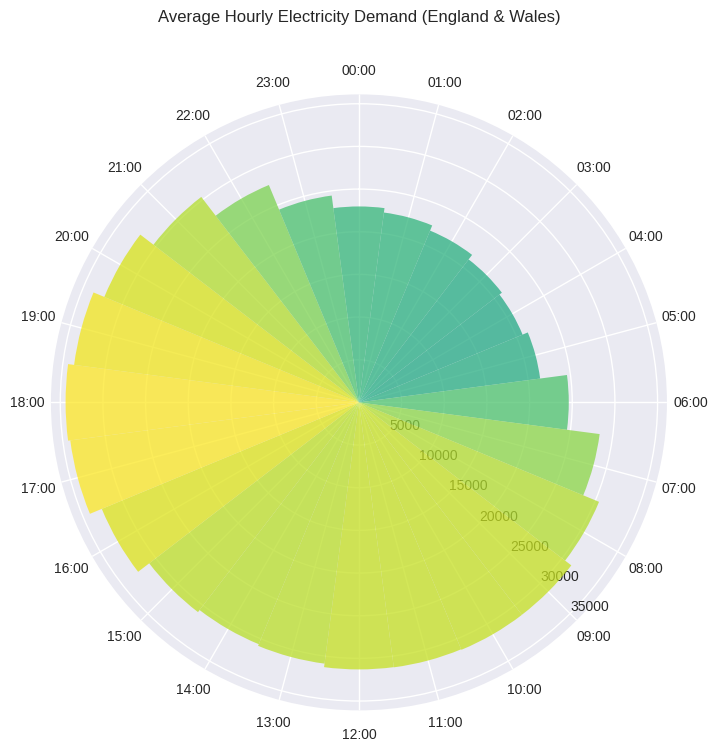

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1️⃣ Load the CSV
# -------------------------
# Replace with the path to your Kaggle file
df = pd.read_csv("historic_demand_2009_2024.csv")

# -------------------------
# 2️⃣ Convert date column to datetime
# -------------------------
df['settlement_date'] = pd.to_datetime(df['settlement_date'])

# -------------------------
# 3️⃣ Map half-hourly periods (1-48) to hours (0-23)
# -------------------------
# Each hour has two settlement periods: (1+2)->0, (3+4)->1, ..., (47+48)->23
df['hour'] = (df['settlement_period'] - 1) // 2

# -------------------------
# 4️⃣ Aggregate to average hourly demand
# -------------------------
hourly_demand = df.groupby('hour')['england_wales_demand'].mean()
hourly_demand = hourly_demand.reindex(range(24), fill_value=0)  # fill missing hours with 0

# -------------------------
# 5️⃣ Prepare data for polar plot
# -------------------------
theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)
radii = hourly_demand.values
width = 2 * np.pi / 24

# Colors proportional to demand
colors = plt.cm.viridis(radii / radii.max())

# -------------------------
# 6️⃣ Plot polar chart
# -------------------------
# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
bars = ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.75)

# Set the angular labels to hours
ax.set_xticks(theta)
ax.set_xticklabels([f"{h:02d}:00" for h in range(24)])

# Rotate so 0:00 is at the top
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Remove default degree labels (this happens automatically when we set custom xticklabels)
ax.tick_params(axis='x', pad=10)  # optional: move labels slightly outward

# Title and radial label position
ax.set_title("Average Hourly Electricity Demand (England & Wales)", va='bottom', y=1.1)
ax.set_rlabel_position(135)  # move radial labels to avoid overlap

plt.show()